## **Consulting Project: predicting crew members**

- Your job is to create a regression model that will help predict how many crew members will be needed for future ships.

- In other words, use the features you think will be useful to predict the value in the Crew column.

In [ ]:
appname = "Linear Regression"

# Look into https://spark.apache.org/downloads.html for the latest version
spark_mirror = "https://mirrors.sonic.net/apache/spark"
spark_version = "3.3.1"
hadoop_version = "3"

# Install Java 8 (Spark does not work with newer Java versions)
! apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and extract Spark binary distribution
! rm -rf spark-{spark_version}-bin-hadoop{hadoop_version}.tgz spark-{spark_version}-bin-hadoop{hadoop_version}
! wget -q {spark_mirror}/spark-{spark_version}/spark-{spark_version}-bin-hadoop{hadoop_version}.tgz
! tar xzf spark-{spark_version}-bin-hadoop{hadoop_version}.tgz

# The only 2 environment variables needed to set up Java and Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/spark-{spark_version}-bin-hadoop{hadoop_version}"

# Set up the Spark environment based on the environment variable SPARK_HOME 
! pip install -q findspark
import findspark
findspark.init()

In [ ]:
from pyspark.ml.regression import LinearRegression
#import SparkSesion
import findspark
findspark.init()

#import SparkSession
appname = "TestApp"
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName(appname).getOrCreate()

#Import Pandas
import pandas as pd

In [ ]:
#READ THE FILES
from google.colab import files 
  
  
regresion = files.upload()

Saving cruise_ship_info.csv to cruise_ship_info.csv


In [ ]:
df = spark.read.options(inferSchema=True, header=True).csv('cruise_ship_info.csv')
df.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [ ]:
#MAKE AN INDEX FOR CRUISEL_LINE COLUMN
#import required library
from pyspark.ml.feature import StringIndexer
cruiseline_indexer = StringIndexer(inputCol="Cruise_line", outputCol="cruiselineIndex")
#Fits a model to the input dataset with optional parameters.
df1 = cruiseline_indexer.fit(df).transform(df)
df1.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+---------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|cruiselineIndex|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+---------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|           16.0|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|           16.0|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|            1.0|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|            1.0|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|            1.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|

In [ ]:
df1.describe().toPandas()


,summary,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew,cruiselineIndex
0,count,158,158,158,158,158,158,158,158,158,158
1,mean,Infinity,None,15.689873417721518,71.28467088607599,18.45740506329114,8.130632911392404,8.830000000000005,39.90094936708861,7.794177215189873,5.063291139240507
2,stddev,None,None,7.615691058751413,37.229540025907866,9.677094775143416,1.793473548054825,4.4714172221480615,8.63921711391542,3.503486564627034,4.758744608182735
3,min,Adventure,Azamara,4,2.329,0.66,2.79,0.33,17.7,0.59,0.0
4,max,Zuiderdam,Windstar,48,220.0,54.0,11.82,27.0,71.43,21.0,19.0


In [ ]:
#CONVERT THE TABLE TO PANDAS FORMAT
dfp=df1.toPandas()
dfp

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew,cruiselineIndex
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,16.0
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,16.0
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70,1.0
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10,1.0
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00,1.0
...,...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59,9.0
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00,9.0
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88,15.0
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88,15.0


In [ ]:
#SELECT THOSE NUMERICAL COLUMNS TO PLOT
rc=dfp.select_dtypes(include='number').iloc[:,:]
rc

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,cruiselineIndex
0,6,30.277,6.94,5.94,3.55,42.64,3.55,16.0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,16.0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,1.0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,1.0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,1.0
...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,9.0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,9.0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,15.0
156,27,5.350,1.67,4.40,0.74,32.04,0.88,15.0


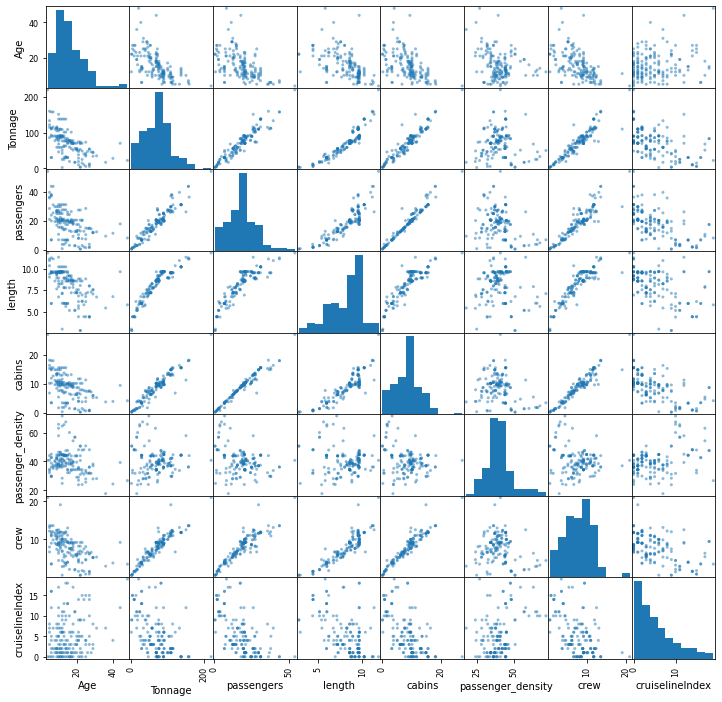

In [ ]:
#COMPARATIVE PLOT
pd.plotting.scatter_matrix(rc,figsize=(12,12));

In [ ]:
#VECTORASSEMBLER ASSEMBLES ALL THE FEATURES INTO ONE VECTOR FROM MULTIPLE COLUMNS THAT CONTAIN TYPE DOUBLE. 
df1.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)
 |-- cruiselineIndex: double (nullable = false)



In [ ]:
#VECTORASSEMBLER ASSEMBLES ALL THE FEATURES INTO ONE VECTOR FROM MULTIPLE COLUMNS THAT CONTAIN TYPE DOUBLE. 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density','cruiselineIndex'], outputCol = 'Attributes')
output = assembler.transform(df1)

In [ ]:
output.show()


+-----------+-----------+---+------------------+----------+------+------+-----------------+----+---------------+--------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|cruiselineIndex|          Attributes|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+---------------+--------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|           16.0|[6.0,30.276999999...|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|           16.0|[6.0,30.276999999...|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|            1.0|[26.0,47.262,14.8...|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|            1.0|[11.0,110.0,29.74...|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8

In [ ]:
#SELECT THE COLUMNS WE ARE INTERESTED IN 
#Input vs Output
compared_data = output.select("Attributes","crew")
compared_data.show()

+--------------------+----+
|          Attributes|crew|
+--------------------+----+
|[6.0,30.276999999...|3.55|
|[6.0,30.276999999...|3.55|
|[26.0,47.262,14.8...| 6.7|
|[11.0,110.0,29.74...|19.1|
|[17.0,101.353,26....|10.0|
|[22.0,70.367,20.5...| 9.2|
|[15.0,70.367,20.5...| 9.2|
|[23.0,70.367,20.5...| 9.2|
|[19.0,70.367,20.5...| 9.2|
|[6.0,110.23899999...|11.5|
|[10.0,110.0,29.74...|11.6|
|[28.0,46.052,14.5...| 6.6|
|[18.0,70.367,20.5...| 9.2|
|[17.0,70.367,20.5...| 9.2|
|[11.0,86.0,21.24,...| 9.3|
|[8.0,110.0,29.74,...|11.6|
|[9.0,88.5,21.24,9...|10.3|
|[15.0,70.367,20.5...| 9.2|
|[12.0,88.5,21.24,...| 9.3|
|[20.0,70.367,20.5...| 9.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
#SPLIT THE TRAINING AND TESTING DATA
train_data,test_data = compared_data.randomSplit([0.8,0.2])
regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'crew')
#Learn to fit the model from training set
regressor = regressor.fit(train_data)
#To predict the prices on testing set
pred = regressor.evaluate(test_data)
#Predict the models
pred.predictions.show()

+--------------------+-----+------------------+
|          Attributes| crew|        prediction|
+--------------------+-----+------------------+
|[4.0,220.0,54.0,1...| 21.0| 20.72391489754454|
|[5.0,86.0,21.04,9...|  8.0| 9.375799871462787|
|[5.0,160.0,36.34,...| 13.6|14.972664719715304|
|[6.0,30.276999999...| 3.55| 4.452940680247625|
|[6.0,90.0,20.0,9....|  9.0|10.145180486344865|
|[9.0,81.0,21.44,9...| 10.0|  9.67674934241929|
|[9.0,90.09,25.01,...| 8.69| 9.387439648038264|
|[9.0,116.0,26.0,9...| 11.0|11.096274717584862|
|[10.0,68.0,10.8,7...| 6.36|6.5399771046195765|
|[10.0,151.4,26.2,...|12.53|10.932619388412604|
|[11.0,90.09,25.01...| 8.48|  8.96727814545484|
|[14.0,30.27699999...| 3.73|3.5017370842242013|
|[14.0,83.0,17.5,9...| 9.45| 9.294657916154403|
|[15.0,30.27699999...|  4.0| 4.042070689008933|
|[15.0,70.367,20.5...|  9.2| 8.780479763330668|
|[15.0,70.367,20.5...|  9.2| 8.780479763330668|
|[16.0,77.499,19.5...|  9.0| 9.209375294960212|
|[17.0,70.0,20.76,...|  7.2| 7.686146613

In [ ]:
#coefficient of the regression model
coeff = regressor.coefficients
#X and Y intercept
intr = regressor.intercept
print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([-0.0174, -0.001, -0.1281, 0.4668, 0.8757, 0.0008, 0.0514])
The Intercept of the model is : -1.259061


In [ ]:
#EVALUATION METRICS
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="crew", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)  
# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)
# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)
# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 0.772
MSE: 0.596
MAE: 0.630
r2: 0.958


Such a high r2 is a positive result, however, the rest of the errors are moderately high. The problem could be in the values that we have assigned in the .randomSplit for the train_data and test_data (0.8 and 0.2), perhaps modifying these values, the evaluation would be better.

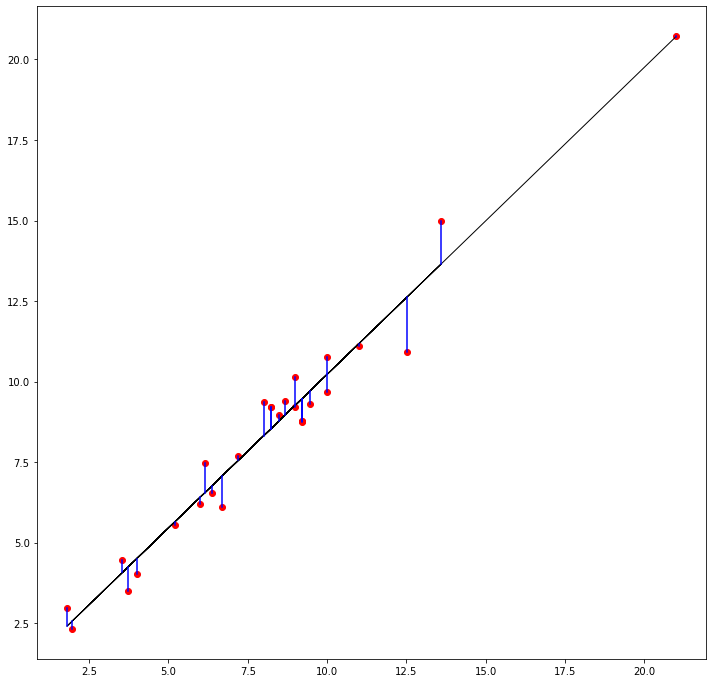

In [ ]:
#APPLY THE LINEAR REGRESSION WITH THE SCIKIT-LEARN PACKAGE
#VISUAL STUDY OF THE CREW COLUMN AND PREDICTIONS
#import libraries
import sklearn 
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#define the variables
x = pred.predictions.select('crew').toPandas()
y = pred.predictions.select('prediction').toPandas()
x_array = pred.predictions.select('crew').toPandas().to_numpy()
y_array = pred.predictions.select('prediction').toPandas().to_numpy()
xl = x.to_numpy().T[0]
yl =y.to_numpy().T[0]
# setting up plot
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x_array, y_array, c='r', zorder=2)
# computing and plotting fit line
m, b = np.polyfit(x_array.T[0], y_array.T[0], 1)
xs = np.linspace(0,max(x_array))
#plot the black line from the command .polyfit 
ax.plot(xl.T, m*xl.T+b, c='k', lw=1)
# The following will draw as many line segments as there are columns 
# in matrices x and y
ax.plot(np.vstack([xl,xl]), np.vstack([yl,m*xl+b]), color="blue");


The squared errors ($\sum_i (y[i] - \hat{y}[i])^2$;), calculated above, is the sum of the squared lengths of the red line segments in the above plot. The estimated values $\hat{y}[i]$  are denoted by `yfit[i]` in the above code.

### **BIBLIOGRAPHY**

- Building A Linear Regression with PySpark and MLlib : https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

- PySpark in Google Colab
Creating a simple linear regression model with PySpark in Colab : https://towardsdatascience.com/pyspark-in-google-colab-6821c2faf41c

- Machine learning: linear regression : https://colab.research.google.com/github/csmastersUH/data_analysis_with_python_2020/blob/master/linear_regression.ipynb?hl=es#scrollTo=rOwEqM4wJSeP

- How to plot lines between datapoints and the Line of best fit? : https://stackoverflow.com/questions/71802448/how-to-plot-lines-between-datapoints-and-the-line-of-best-fit

- Plotting with Pandas and Matplotlib: https://colab.research.google.com/github/mottaquikarim/PythonProgramming/blob/master/app/src/Notebooks/data_viz.ipynb?hl=es#scrollTo=1HkkekvDDOOj


